### Задание 1
Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по 1 месяцу.

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

In [37]:
Path_Energy = 'Downloads/my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.tail()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2018-08-02,20:00:00,44057.0,2018,8,2,3,214,31,3,20,0,0,0
2018-08-02,21:00:00,43256.0,2018,8,2,3,214,31,3,21,0,0,0
2018-08-02,22:00:00,41552.0,2018,8,2,3,214,31,3,22,0,0,0
2018-08-02,23:00:00,38500.0,2018,8,2,3,214,31,3,23,0,0,0
2018-08-03,00:00:00,35486.0,2018,8,3,3,215,31,4,0,0,0,0


In [38]:
data_energy_resampled_months = data.resample("M").mean()
data_energy_resampled_months.tail()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2018-04-30,27353.266667,2018.0,4.0,15.500000,2.0,105.500000,15.500000,3.000000,11.500000,0.000000,0.000000,0.000000
2018-05-31,28599.951613,2018.0,5.0,16.000000,2.0,136.000000,19.870968,2.903226,11.500000,0.032258,0.032258,0.032258
2018-06-30,32014.469444,2018.0,6.0,15.500000,2.0,166.500000,24.200000,3.100000,11.500000,0.000000,0.000000,0.000000
2018-07-31,36696.737903,2018.0,7.0,16.000000,3.0,197.000000,28.580645,2.935484,11.500000,0.032258,0.032258,0.032258
2018-08-31,39331.795918,2018.0,8.0,1.530612,3.0,213.530612,31.000000,2.530612,11.265306,0.000000,0.000000,0.000000


### Задание 2
Подберите параметры модели SARIMAX для этого ряда.

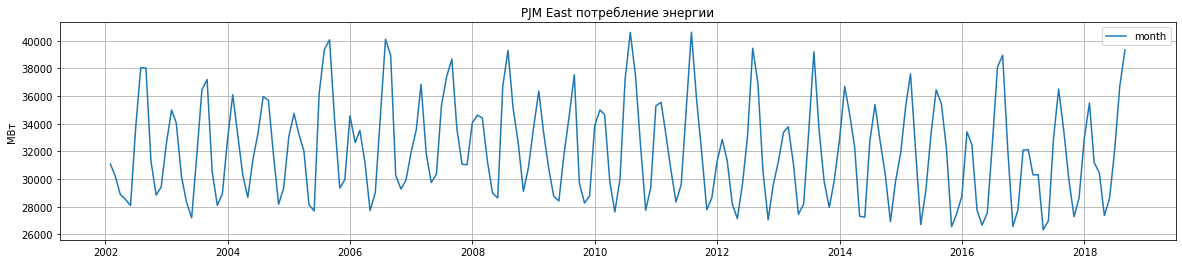

In [39]:
plt.figure(figsize =(20,4))
plt.plot( data_energy_resampled_months.index, data_energy_resampled_months['PJME_MW'], label='month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.grid()
plt.show()

In [20]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [17]:
# Определим p, d и q 
q = 2
p = 1
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
qs = 1
ps = 0
ds = 0
seasonal_pdq = [ps, ds, qs , 5] 

In [18]:
print(f'SARIMAX: p,d,q={p, d, q} : ps,ds,qs, S={seasonal_pdq}')

SARIMAX: p,d,q=(1, 2, 2) : ps,ds,qs, S=[0, 0, 1, 5]


In [22]:
mod = sm.tsa.statespace.SARIMAX(data_energy_resampled_months['PJME_MW'].values[:-3],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print(f'SARIMAX{pdq}x{seasonal_pdq} - AIC:{results.aic}')

SARIMAX[1, 2, 2]x[0, 0, 1, 5] - AIC:3555.578000721068


In [23]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  197
Model:             SARIMAX(1, 2, 2)x(0, 0, [1], 5)   Log Likelihood               -1772.789
Date:                             Tue, 12 May 2020   AIC                           3555.578
Time:                                     21:30:56   BIC                           3571.734
Sample:                                          0   HQIC                          3562.124
                                             - 197                                         
Covariance Type:                               opg                                         
=========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

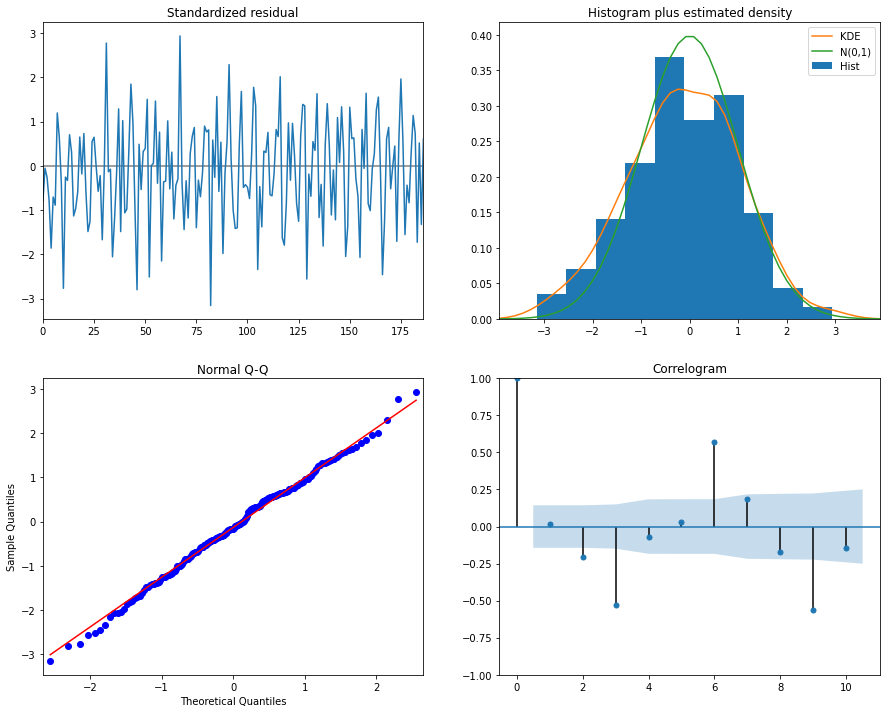

In [26]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [43]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 5)
SARIMAX: (0, 0, 1) x (0, 0, 0, 5)
SARIMAX: (0, 0, 2) x (0, 0, 0, 5)
SARIMAX: (0, 0, 2) x (0, 0, 1, 5)


In [28]:
data_energy_resampled_months['PJME_MW'].values.shape

(200,)

In [33]:
import math

In [53]:
min_AIC = math.inf 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_energy_resampled_months['PJME_MW'].values[75:-7],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            if min_AIC > results.aic:
                min_AIC = results.aic
                pdq = param
                seasonal_pdq = param_seasonal
        except:
            continue
print(f'ARIMA{pdq}x{seasonal_pdq} -  AIC:{min_AIC}')

ARIMA(0, 0, 0)x(0, 1, 2, 5) -  AIC:inf


In [61]:
mod = sm.tsa.statespace.SARIMAX(data_energy_resampled_months['PJME_MW'].values[75:-4],order=[0,0,0],
                                seasonal_order=[0,1,2,5] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print(f'AIC: {results_opt.aic}')

AIC: 2046.0185881656234


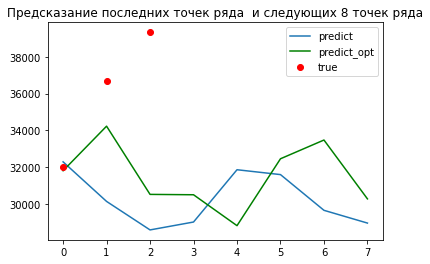

In [62]:
pred_dynamic = results.forecast(8)   
pred_dynamic_opt = results_opt.forecast(8)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_energy_resampled_months['PJME_MW'].values[-3:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 8 точек ряда')
plt.legend()

plt.show()

### Задание 3
Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Что-то пошло не так у меня в модели. Понедельное было несравнимо лучше.

### Задание 4
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [71]:
Path_Covid = 'covid19.csv'
data_covid = pd.read_csv(Path_Covid, index_col=[0], parse_dates=[0])

data_covid.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [75]:
data_covid['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

Будем рассматривать Бельгию и число смертей от коронавируса.

In [88]:
df_Belgium = data_covid.loc[data_covid['Country/Region']=='Belgium', :]

In [101]:
df_Belgium.shape

(92, 7)

In [100]:
df_Belgium_deaths = df_Belgium[['ObservationDate',  'Deaths']]
df_Belgium_deaths.tail()

,ObservationDate,Deaths
SNo,,
20267,05/01/2020,7703.0
20590,05/02/2020,7765.0
20913,05/03/2020,7844.0
21236,05/04/2020,7924.0
21559,05/05/2020,8016.0


Text(0.5, 0, 't')

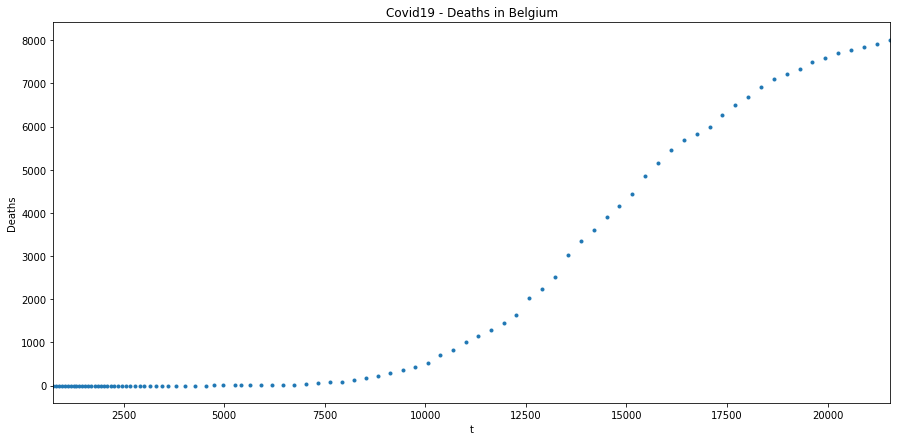

In [91]:
_ = df_Belgium_deaths['Deaths'].plot( style='.', figsize=( 15, 7 ), title='Covid19 - Deaths in Belgium')
plt.ylabel('Number of deaths')
plt.xlabel('t')

Видно, что нет сезона и цикла, но есть тренд. Значит ряд нестационарный и стационарным его надо будет сделать разностями.

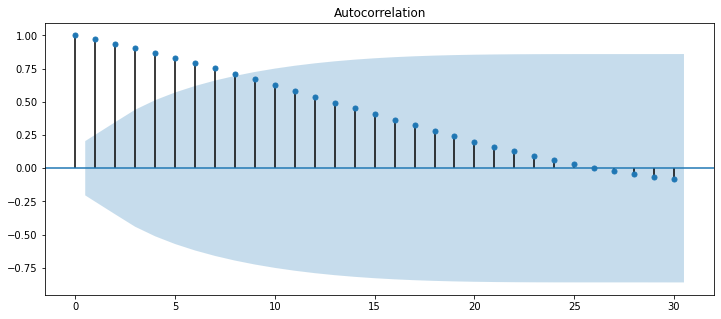

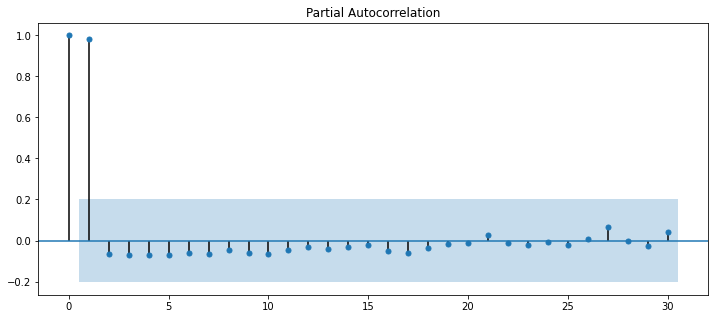

In [103]:
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(df_Belgium_deaths['Deaths'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(df_Belgium_deaths['Deaths'].values, lags=30)
plt.show()

 Из автокорреляции видно, что корреляция есть с 5-7 значениями ранее и для на PACF мы видим, что только 1-й порядок разностей важен для нашего процесса (AR 1).
 Использовать будем ARIMA (нет сезона).

In [104]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

modb = sm.tsa.statespace.SARIMAX(df_Belgium_deaths['Deaths'].values[:-10], #10 точек для теста
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print(f'ARIMA{pdq} - AIC:{resultsb.aic}')

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:853.1102072973819
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -420.555
Date:                Wed, 13 May 2020   AIC                            853.110
Time:                        14:52:55   BIC                            867.327
Sample:                             0   HQIC                           858.806
                                 - 82                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    